# Tech Layoffs

Olojede Joseph

31/3/2024

# INTRODUCTION
Tech Layoffs became a common phenomena in the advent of COVID-19 as a lot of companies lost significant amount of revenue. It therefore became imperative to peer into this trending event even as we see that the future of the world is in improvinng technology.

As a Data Analyst, it is quite clear that I must see beyond the numbers and provide answers that will satisfy the curiosity of minds as to why there is an increasing number of layoffs in a future driven technology world.

# PREPARE

The public data which explored the rate of tech layoffs all over the world used for this analysis is <a href="[url](https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024/data)" target="_blank">Tech Layoff Data</a>.

 The data has been made available on the popular dataset site, Kaggle.com. 
The dataset contains information on the following:
* Company name.
* Location HQ and Country.
* Continent.
* Laid off.
* Date of Layoff.
* Company Size before and after Layoff
* Type of Industry and Stage.
* Money raisd in Million($).
* Year they were laid off.

The dataset spans a period of 2020 - 2024 which will allow sufficient time to analyze the trends that may occur during the specified time interval.

# PROCESS

**Load packages and set up environment for analysis.**


**Import necessary environments.**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import math
import statistics
import pingouin
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import rankdata
from scipy.stats import shapiro
from scipy.stats import kstest, anderson
from scipy.stats import mannwhitneyu

**Import the dataset.**

In [14]:
layoff = pd.read_excel('tech_layoffs.xlsx', parse_dates=['Date_layoffs'])

**Overview of the dataset.**

In [15]:
layoff.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


**Descriptive statistics of the data.**

In [16]:
layoff.describe()

,#,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1418.000000,1418.000000,1418,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,1823.411848,267.392102,2022-05-03 22:26:34.358251008,21.901584,3556.228491,3288.836389,2021.878702,33.787884,-59.648503
min,3.000000,3.000000,2020-03-12 00:00:00,0.044980,4.000000,0.000000,2020.000000,-41.286640,-123.119340
25%,1038.500000,40.000000,2022-02-17 06:00:00,10.000000,213.000000,151.250000,2022.000000,34.052230,-122.272333
50%,1882.500000,86.000000,2022-09-23 00:00:00,15.000000,531.000000,430.000000,2022.000000,37.774930,-79.398640
75%,2616.250000,200.000000,2023-02-09 00:00:00,27.000000,1414.750000,1200.000000,2023.000000,42.331430,-0.125740
max,3290.000000,12000.000000,2024-11-01 00:00:00,100.000000,400000.000000,392000.000000,2024.000000,60.169520,174.775570
std,922.671427,877.468380,NaN,20.661776,22478.365010,21878.258702,1.147283,18.813799,74.471053


**Check the number of entries**

In [17]:
print(f'The total number of entries are {len(layoff)}.')

The total number of entries are 1418.


**Timeframe of the data.**

In [22]:
print(f'This dataset spans a timeframe between {layoff['Date_layoffs'].dt.strftime('%Y').min()} and {layoff['Date_layoffs'].dt.strftime('%Y').max()}.')

This dataset spans a timeframe between 2020 and 2024.


**Number of companies in the dataset(not duplicated).**

In [ ]:
print(f'There are {layoff['Company'].nunique()} companies recorded in this dataset.')

There are 1128 companies recorded in this dataset.


**Check the company with the highest percentage of layoff.**

In [ ]:
company_by_percent_layoff = layoff.sort_values(by='Percentage', ascending=False).iloc[0]
print(f'The company with the highest percentage of layoffs is {company_by_percent_layoff['Company']}.')

The company with the highest percentage of layoffs is Frontdesk.


**Country with highest number of Layoffs.**

In [ ]:
country_max_no_of_layoff = layoff.sort_values(by=['Country'], ascending=False).iloc[0]
print(f'The country with the highest number of layoffs is {country_max_no_of_layoff['Country']}.')

The country with the highest number of layoffs is United Kingdom.


**Continent with the highest proportion of layoffs.**

In [ ]:
cont_highest_layoffs = layoff['Continent'].value_counts(normalize=True).idxmax()
print(f'The continent with the highest proportion of layoffs is {cont_highest_layoffs}.')

The continent with the highest proportion of layoffs is North America.


# Data Cleaning and Validation.

**Check for duplicate values.**

In [ ]:
layoff.drop_duplicates(inplace=True)

**Data Validation.**

In [ ]:
layoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1418 non-null   int64         
 1   Company                      1418 non-null   object        
 2   Location_HQ                  1418 non-null   object        
 3   Country                      1418 non-null   object        
 4   Continent                    1418 non-null   object        
 5   Laid_Off                     1418 non-null   int64         
 6   Date_layoffs                 1418 non-null   datetime64[ns]
 7   Percentage                   1418 non-null   float64       
 8   Company_Size_before_Layoffs  1418 non-null   int64         
 9   Company_Size_after_layoffs   1418 non-null   int64         
 10  Industry                     1418 non-null   object        
 11  Stage                        1418 non-null 

**Dropped three columns that were irrelevant to the analysis.**

The columns are ['#', 'lat', 'lng'].

In [ ]:
layoff.drop(axis=1, columns=['#', 'lat', 'lng'], inplace=True)

**Data Formatting.**

I renamed the 'Money_Raised_in_$_mil' to 'Money_Raised_in_mil($)'

I found that the column, 'Money_Raised_in_$_mil' was in 'object' data type instead of 'float' data type.

However, I had to first remove the dollar sign as it couldn't be converted to float, thereby causing an error.

I then converted it to 'int' form.

In [ ]:
layoff.rename(columns={'Money_Raised_in_$_mil' : 'Money_Raised_in_mil($)'}, inplace=True)

# Remove the dollar sign ('$') and convert the column to numeric values
layoff['Money_Raised_in_mil($)'] = layoff['Money_Raised_in_mil($)'].str.replace('$', '').astype(float)

# Exploratory Data Analysis

**Created a new column called 'Day of the Week'.**

In [ ]:
layoff['Day'] = layoff['Date_layoffs'].dt.day_name()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

layoff['Day'] = pd.Categorical(layoff['Day'],\
                                      categories=days_order, ordered=True)

**Created a new column called 'Month'.**

In [ ]:
layoff['Month'] = layoff['Date_layoffs'].dt.month_name()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


layoff['Month'] = pd.Categorical(layoff['Month'],\
                                      categories=months_order, ordered=True)

**Pie chart visualizing Continent by Number of Layoffs.**

Text(0.5, 1.0, 'Proportion of Continent by Layoff')

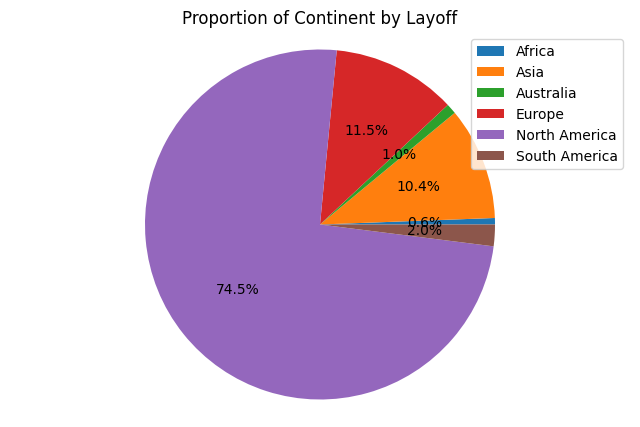

In [ ]:
cont_by_layoff = layoff.groupby('Continent', as_index=False)['Laid_Off'].agg('sum')

labels = cont_by_layoff['Continent']
sizes = cont_by_layoff['Laid_Off']
plt.figure(figsize=(8, 5))
plt.pie(sizes, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='upper right')
plt.title('Proportion of Continent by Layoff')

**Visualization to show the trend of layoffs by Year.**

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


([<matplotlib.axis.XTick at 0x23eda6610d0>,
 [Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

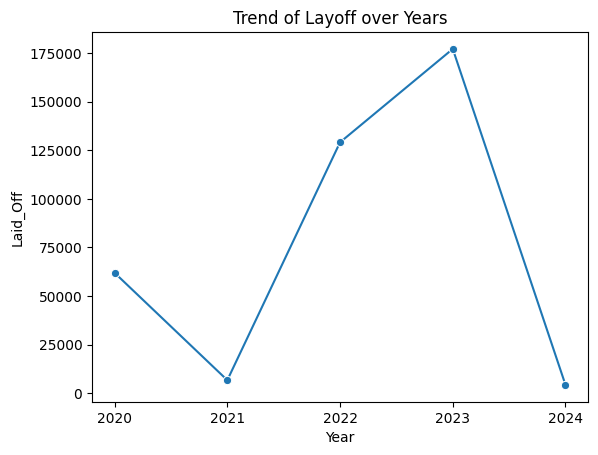

In [ ]:
layoff_by_year = layoff.groupby(['Year'], as_index=False)['Laid_Off'].agg('sum')
                                                        
sns.lineplot(data=layoff_by_year, x='Year', y='Laid_Off', marker='o', linestyle='-')
plt.title('Trend of Layoff over Years')
plt.xticks(layoff_by_year['Year'])

**Visualization to show the trend of layoffs by Year and Continent.**

([<matplotlib.axis.XTick at 0x23eda6fecc0>,
 [Text(2020, 0, '2020'),
  Text(2020, 0, '2020'),
  Text(2020, 0, '2020'),
  Text(2020, 0, '2020'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2021, 0, '2021'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2022, 0, '2022'),
  Text(2022, 0, '2022'),
  Text(2022, 0, '2022'),
  Text(2022, 0, '2022'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024')])

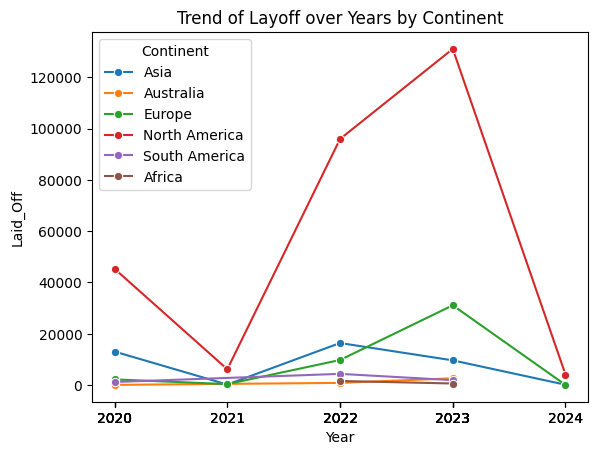

In [ ]:
layoff_by_year = layoff.groupby(['Year', 'Continent'], as_index=False)['Laid_Off'].agg('sum')
                                                        
sns.lineplot(data=layoff_by_year, x='Year', y='Laid_Off',hue='Continent', marker='o', linestyle='-')
plt.title('Trend of Layoff over Years by Continent')
plt.xticks(layoff_by_year['Year'])

**Variable to subset the data by Company, Laid_Off and Stage.**

In [ ]:
company_stage_laidOff = layoff[['Company', 'Laid_Off', 'Stage']]

**Barplot showing trend of layoff  by 'Day of the Week'.**

C:\Users\user\AppData\Local\Temp\ipykernel_9012\382946570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  layoff_by_day = layoff.groupby('Day')['Laid_Off'].agg('sum')


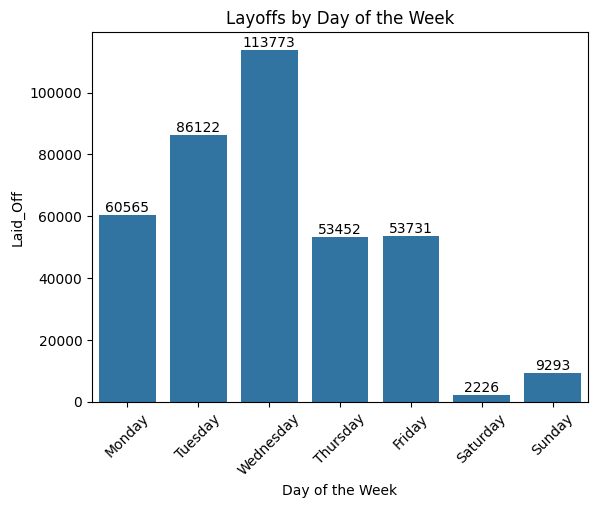

In [ ]:
layoff_by_day = layoff.groupby('Day')['Laid_Off'].agg('sum')

sns.barplot(data=layoff_by_day)
plt.title('Layoffs by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(range(len(days_order)), days_order, rotation=45)

for index, value in enumerate(layoff_by_day.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

**Barplot showing trend of layoff  by 'Month'.**

C:\Users\user\AppData\Local\Temp\ipykernel_9012\1228760390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  layoff_by_month = layoff.groupby('Month')['Laid_Off'].agg('sum')


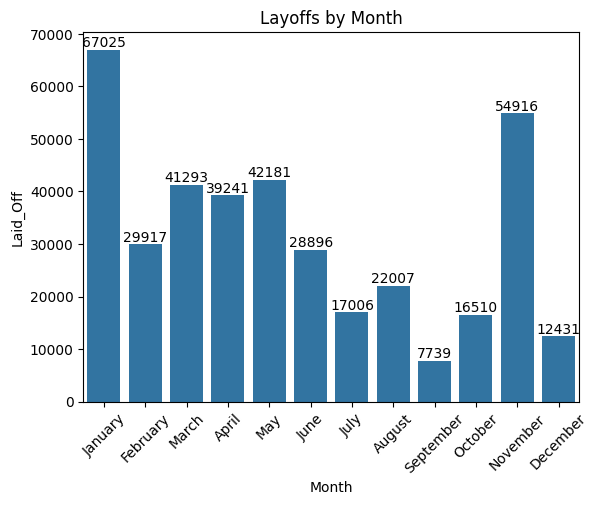

In [ ]:
layoff_by_month = layoff.groupby('Month')['Laid_Off'].agg('sum')

sns.barplot(data=layoff_by_month)

plt.title('Layoffs by Month')
plt.xticks(range(len(months_order)), months_order, rotation=45)

# Adding annotations to each bar
for index, value in enumerate(layoff_by_month.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

**Barplot showing variation of Country by Number of Layoff.**

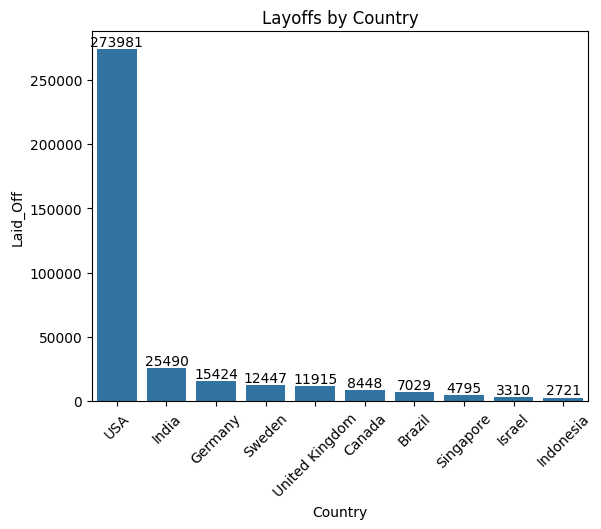

In [ ]:
layoff_by_country = layoff.groupby('Country')['Laid_Off'].agg('sum')\
    .sort_values(ascending=False)

sns.barplot(data=layoff_by_country.head(10))
plt.title('Layoffs by Country')
plt.xlabel('Country')
plt.xticks(rotation=45)

for index, value in enumerate(layoff_by_country.head(10).values):
    plt.text(index, value, str(value), ha='center', va='bottom')

**Variable to calculate the top 10 industries by the percentage of layoff.**

Text(0.5, 1.0, 'Top 10 Industries by Percentage Layoff')

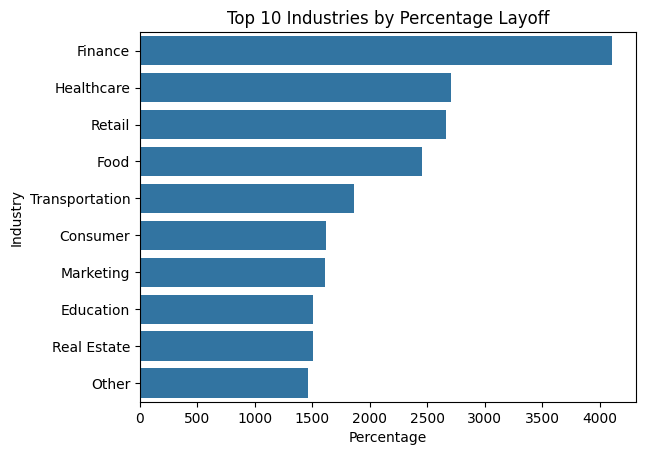

In [ ]:
percent_by_top_10_ind = layoff.groupby('Industry', as_index=False)\
    ['Percentage'].agg('sum').sort_values(by='Percentage', ascending=False).head(10)

sns.barplot(data=percent_by_top_10_ind, x='Percentage', y='Industry')

plt.title('Top 10 Industries by Percentage Layoff')

**Variable to calculate the bottom 10 industries by the percentage of layoff.**

Text(0.5, 1.0, 'Bottom 10 Industries by Percentage Layoff')

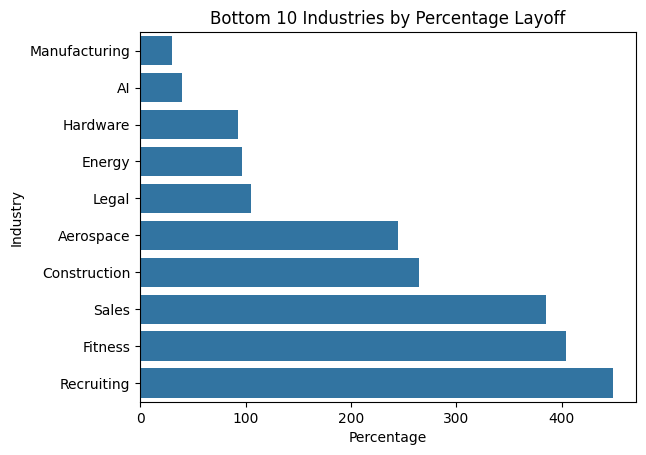

In [ ]:
percent_by_top_10_ind = layoff.groupby('Industry', as_index=False)\
    ['Percentage'].agg('sum').sort_values(by='Percentage', ascending=True).head(10)

sns.barplot(data=percent_by_top_10_ind, x='Percentage', y='Industry')

plt.title('Bottom 10 Industries by Percentage Layoff')

**Variable to calculate the top 10 company by stage and the percentage of layoff.**

C:\Users\user\AppData\Local\Temp\ipykernel_9012\2236605184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=percent_by_top_10_ind_stage, x='Percentage', y='Company', hue='Stage', ci=None)


Text(0.5, 1.0, 'Top 10 Company by Percentage Layoff and Stage')

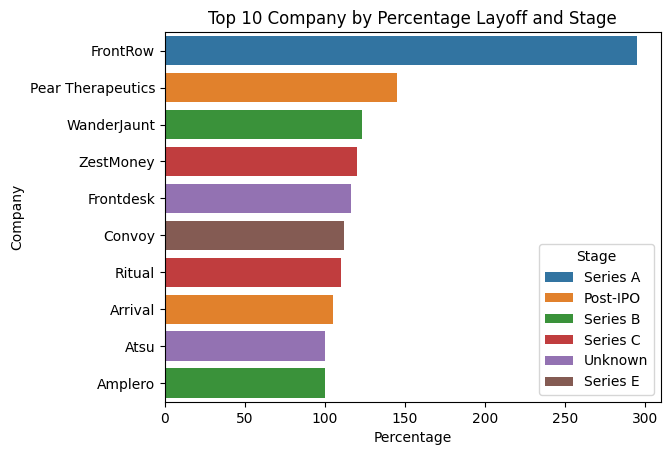

In [ ]:
percent_by_top_10_ind_stage = layoff.groupby(['Stage', 'Company'], as_index=False)\
    ['Percentage'].agg('sum').sort_values(by= 'Percentage', ascending=False).head(10)

sns.barplot(data=percent_by_top_10_ind_stage, x='Percentage', y='Company', hue='Stage', ci=None)

plt.title('Top 10 Company by Percentage Layoff and Stage')

**Variable to calculate the bottom 10 company by stage and the percentage of layoff.**

C:\Users\user\AppData\Local\Temp\ipykernel_9012\2831791478.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=percent_by_top_10_ind_stage, x='Percentage', y='Company',hue='Stage', ci=None)


Text(0.5, 1.0, 'Top 10 Company by Percentage Layoff and Stage')

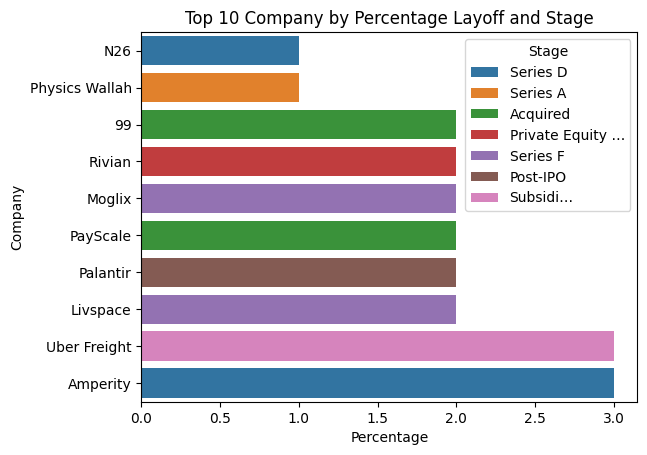

In [ ]:
percent_by_top_10_ind_stage = layoff.groupby(['Stage', 'Company'], as_index=False)\
    ['Percentage'].agg('sum').sort_values(by= 'Percentage', ascending=True).head(10)

sns.barplot(data=percent_by_top_10_ind_stage, x='Percentage', y='Company',hue='Stage', ci=None)

plt.title('Top 10 Company by Percentage Layoff and Stage')

**Correlation between number of Layoffs and Money Made.**

Text(0.5, 1.0, 'Graph showing Correlation between Layoffs and Money Made')

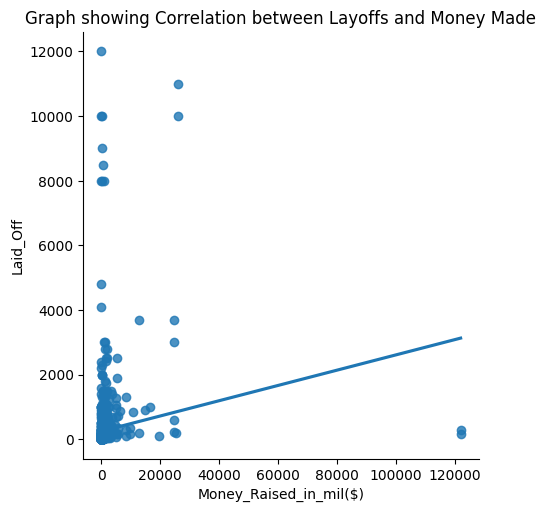

In [ ]:
sns.lmplot(data=layoff, y='Laid_Off', x='Money_Raised_in_mil($)', ci=None)

plt.title('Graph showing Correlation between Layoffs and Money Made')

*From the above visualization, it shows a positive correlation between the number of layofs and the amount made in millions.*

**Show the distribution of the data.**

<Axes: >

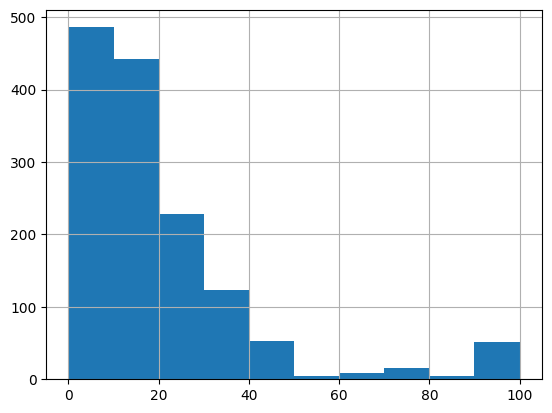

In [ ]:
layoff['Percentage'].hist()

*The above plot, shows the data is not normally distributed.*

**Hypothesis**: *The relationship between money made in millions and number of layoffs is connected.* 

In [ ]:
alpha = 0.05

# Perform left-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=layoff["Money_Raised_in_mil($)"],
                          y=layoff["Laid_Off"],
                          alternative="less")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.05:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': 1.0, 'result': 'fail to reject'}


*From the above information , we can conclude that: the money made in millions from tech layoffs is connected.*

*However, there does not include strong statistical claims to back it up.*

**Conduct a chi-squared test to determine if the two variables(Industry and Stage) are dependent on each other.**

In [ ]:
alpha = 0.05

expected, observed, stats = pingouin.chi2_independence(data=layoff, x='Industry', y='Stage', correction=False)
print(stats[stats['test'] == 'pearson']) 

      test  lambda        chi2    dof          pval    cramer     power
0  pearson     1.0  735.043409  435.0  9.649780e-18  0.185897  0.483495


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:8073: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:8073: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:8070: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


**From the above result, it shows that the p-value is smaller than the significance level.**

*Hence, this indicates that the type of Industry and the stage of development are inter-independent which makes them significant predictors for the likelihood of layoffs.*

# **Develop a predictive model to determine the probability of layoffs by various factors such as:**
* Stage of business development (Post-IPO, Series B etc)
* Type of industry (travel, AI etc)
* Day of the Week
* Month
* Country

**Subset the dataset based on the Country, Company, Stage, Industry, Day, Month and Laid_Off.**

In [ ]:
prob_analysis_sample = layoff[['Industry', 'Stage', 'Day', 'Month', 'Country', 'Company', 'Laid_Off']]

**Determine the probability of layoff by the day of the week.**

C:\Users\user\AppData\Local\Temp\ipykernel_9012\99936743.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_layoff_by_day = prob_analysis_sample.groupby('Day')['Laid_Off'].sum()
C:\Users\user\AppData\Local\Temp\ipykernel_9012\99936743.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sorted_day_layoff, x='Day', y='Laid_Off', ci=None, order=sorted_day_layoff['Day'])


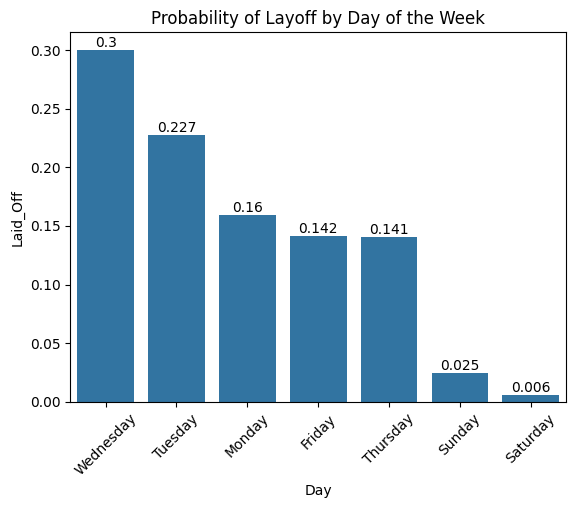

In [ ]:
prob_layoff_by_day = prob_analysis_sample.groupby('Day')['Laid_Off'].sum()

total_layoff_by_day = prob_layoff_by_day.sum()
total_prob_layoff_by_day = prob_layoff_by_day/total_layoff_by_day
total_prob_layoff_by_day_reset = total_prob_layoff_by_day.reset_index()
day_layoff = total_prob_layoff_by_day.reset_index().sort_values(by='Day', ascending=False)

sorted_day_layoff = day_layoff.sort_values(by='Laid_Off', ascending=False)
sns.barplot(data=sorted_day_layoff, x='Day', y='Laid_Off', ci=None, order=sorted_day_layoff['Day'])
plt.title('Probability of Layoff by Day of the Week')
plt.xticks(rotation=45)

# Annotate the text to the chart in descending order
sorted_text_data = sorted_day_layoff['Laid_Off']
for index, value in enumerate(sorted_text_data):
    plt.text(index, value, str(round(value, 3)), ha='center', va='bottom')

plt.show()


**Determine the probability of layoff by the Month of the year.**

C:\Users\user\AppData\Local\Temp\ipykernel_9012\2389476117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_layoff_by_month = prob_analysis_sample.groupby('Month')['Laid_Off'].sum()
C:\Users\user\AppData\Local\Temp\ipykernel_9012\2389476117.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sorted_month_layoff, x='Month', y='Laid_Off', ci=None, order=sorted_month_layoff['Month'])


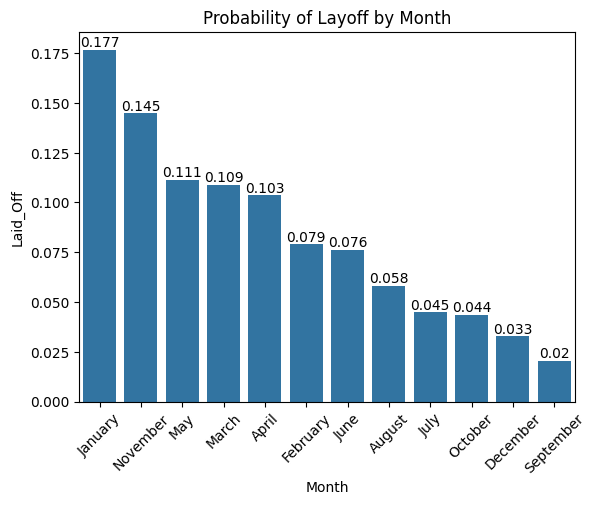

In [ ]:
prob_layoff_by_month = prob_analysis_sample.groupby('Month')['Laid_Off'].sum()
prob_layoff_by_month

total_layoff_by_month = prob_layoff_by_month.sum()
total_prob_layoff_by_month = prob_layoff_by_month/total_layoff_by_month
total_prob_layoff_by_month_reset = total_prob_layoff_by_month.reset_index()
month_layoff = total_prob_layoff_by_month.reset_index().sort_values(by='Month',ascending=False)

sorted_month_layoff = month_layoff.sort_values(by='Laid_Off', ascending=False)
sns.barplot(data=sorted_month_layoff, x='Month', y='Laid_Off', ci=None, order=sorted_month_layoff['Month'])
plt.title('Probability of Layoff by Month')
plt.xticks(rotation=45)

# Annotate the text to the chart in descending order
sorted_text_data = sorted_month_layoff['Laid_Off']
for index, value in enumerate(sorted_text_data):
    plt.text(index, value, str(round(value, 3)), ha='center', va='bottom')

plt.show()


**Determine the probability of layoff by the Type of Industry.**

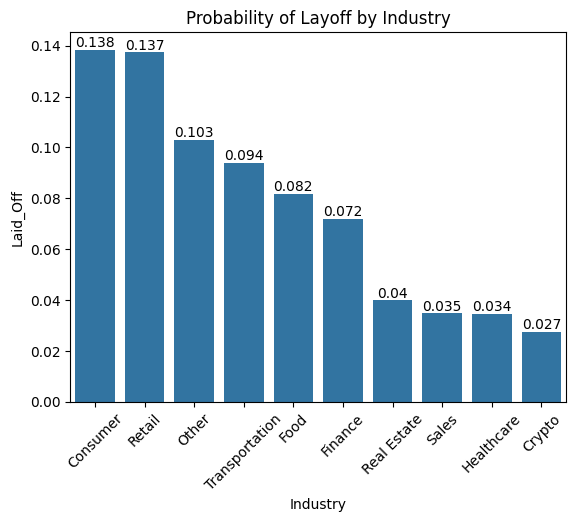

In [ ]:
prob_layoff_by_industry = prob_analysis_sample.groupby('Industry')['Laid_Off'].sum()
prob_layoff_by_industry

total_layoff_by_industry = prob_layoff_by_industry.sum()
total_prob_layoff_by_industry = prob_layoff_by_industry/total_layoff_by_industry
ind_layoff = total_prob_layoff_by_industry.sort_values(ascending=False)
total_prob_layoff_by_industry_reset = total_prob_layoff_by_industry.reset_index()

# Barplot showing the probabilty per industry
sns.barplot(data=ind_layoff.head(10))
plt.title('Probability of Layoff by Industry')
plt.xticks(rotation=45)

for index, value in enumerate(ind_layoff.head(10).values):
    plt.text(index, value, str(round(value, 3)), ha='center', va='bottom')

**Determine the probability of layoff by the Type of Stage.**

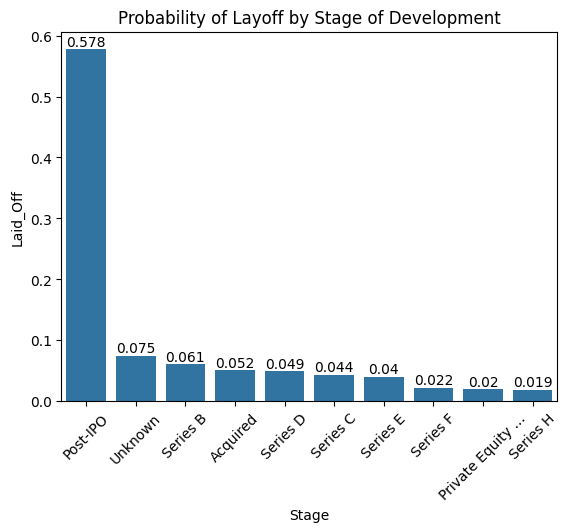

In [ ]:
prob_layoff_by_stage = prob_analysis_sample.groupby('Stage')['Laid_Off'].sum()
prob_layoff_by_stage

total_layoff_by_stage = prob_layoff_by_stage.sum()
total_prob_layoff_by_stage = prob_layoff_by_stage/total_layoff_by_stage
stage_layoff = total_prob_layoff_by_stage.sort_values(ascending=False)

total_prob_layoff_by_stage_reset = total_prob_layoff_by_stage.reset_index()

# Barplot showing the probabilty per stage
sns.barplot(data=stage_layoff.head(10))
plt.title('Probability of Layoff by Stage of Development')
plt.xticks(rotation=45)

for index, value in enumerate(stage_layoff.head(10).values):
    plt.text(index, value, str(round(value, 3)), ha='center', va='bottom')

**Determine the probability of layoff by the Country.**

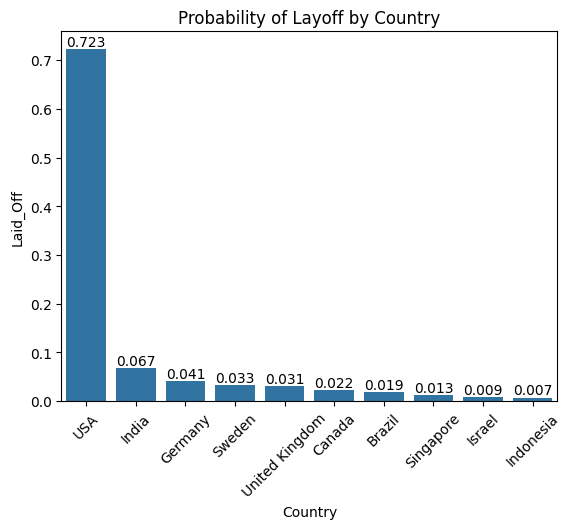

In [ ]:
prob_layoff_by_country = prob_analysis_sample.groupby('Country')['Laid_Off'].sum()

total_layoff_by_country = prob_layoff_by_country.sum()
total_prob_layoff_by_country = prob_layoff_by_country/total_layoff_by_country
prob_country_layoff = total_prob_layoff_by_country.sort_values(ascending=False)
total_prob_layoff_by_country_reset = total_prob_layoff_by_country.reset_index()

# Barplot showing the probabilty per country
sns.barplot(data=prob_country_layoff.head(10))
plt.title('Probability of Layoff by Country')
plt.xticks(rotation=45)

for index, value in enumerate(prob_country_layoff.head(10).values):
    plt.text(index, value, str(round(value, 3)), ha='center', va='bottom')

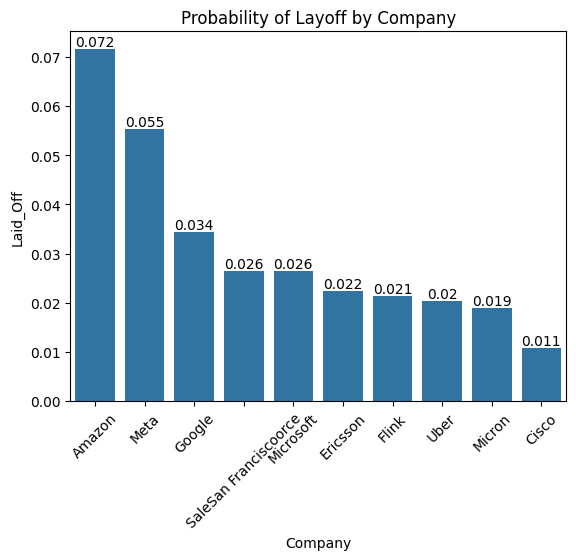

In [ ]:
prob_layoff_by_company = prob_analysis_sample.groupby('Company')['Laid_Off'].sum()

total_layoff_by_company = prob_layoff_by_company.sum()
total_prob_layoff_by_company = prob_layoff_by_company/total_layoff_by_company
prob_company_layoff = total_prob_layoff_by_company.sort_values(ascending=False)
total_prob_layoff_by_company_reset = total_prob_layoff_by_company.reset_index()

# Barplot showing the probabilty per country
sns.barplot(data=prob_company_layoff.head(10))
plt.title('Probability of Layoff by Company')
plt.xticks(range(10), prob_company_layoff.head(10).index, rotation=45)

for index, value in enumerate(prob_company_layoff.head(10).values):
    plt.text(index, value, str(round(value, 3)), ha='center', va='bottom')

In [ ]:
layoff.columns

Index(['Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_mil($)', 'Year', 'Day', 'Month'],
      dtype='object')

**Combined different probabilities for different variables under various conditions.**

In [ ]:
# Filter each DataFrame based on the conditions
filtered_df1 = total_prob_layoff_by_month_reset[total_prob_layoff_by_month_reset['Month'] == 'January']
filtered_df2 = total_prob_layoff_by_country_reset[total_prob_layoff_by_country_reset['Country'] == 'USA']
filtered_df3 = total_prob_layoff_by_stage_reset[total_prob_layoff_by_stage_reset['Stage'] == 'Post-IPO']
filtered_df4 = total_prob_layoff_by_industry_reset[total_prob_layoff_by_industry_reset['Industry'] == 'Consumer']
filtered_df5 = total_prob_layoff_by_day_reset[total_prob_layoff_by_day_reset['Day'] == 'Wednesday']
filtered_df6 = total_prob_layoff_by_company_reset[total_prob_layoff_by_company_reset['Company'] == 'Amazon']

# Multiply the probabilities
predictive_probability = (filtered_df1['Laid_Off'].values * 
                        filtered_df2['Laid_Off'].values *
                        filtered_df3['Laid_Off'].values *
                        filtered_df4['Laid_Off'].values *
                        filtered_df5['Laid_Off'].values).prod()


factor = 10 ** 6

# Round down the number to the desired number of decimal places
predictive_probability = np.floor(predictive_probability * factor) / factor
# Print the combined probability
print("Predictive probability:", (predictive_probability))


Predictive probability: 0.003064


# Conclusion

In this study, a comprehensive analysis of the *Tech Layoff Data* was carried out to understand the following:
1. The rate at which layoffs occur all over the world.
2. The factors which may influence the rate of layoffs all over the world
3. The probability of being laid off depending on a number of critical values such as stage of development, industry etc.

### Key Insights
* The tech layoff data contains 1418 entries recorded from 2020 till 2024.

* It covers an expansive range of 1128 companies. 
* Frontdesk was the company with the highest proportion of layoffs.
* USA had the most number of layoffs followed by India, Germany etc.
* It could be observed from the pie chart that almost three-quarter of the total layoffs reprsenting 74.5% are from North America with Europe, Asia, South America, Australia and Africa accumulating 11.5%, 10.4%, 2%, 1% and 0.6% respectively.

##### Bivariate Analysis
* Over the years, the rate of layoffs was first recorded in the year 2020 amd then plummetted in 2021 before it spiked in 2022 and reached an alltime hgh in the year 2023 and then plummetted down in the year 2024.
* It was also discovered that when cross matching the day of the week by the amount of layoff that Wednesday was distant first among the days of the week followed by Tuesday, Monday et al.
* In the order of the months, January, the first month of the year showed he highest amount of layoffs followed by November, May and the rest.
* Varying the amount of Layoffs by the Country, It was shown that the USA accounted for a large percentage of Layoffs with a staggering 273,981 layoffs with India and Germany coming next with 25,490 and 15,424.
* In varying the type of Industries by the perecentage of Layoffs, The Finance, Healthcare, Retail, Food, Transportation,Consumer, Marketing, Education and Real Estate Industries were among the top 10 industries popuarly known for layoffs.
* On the other hand, the Manufacturing, AI and Hardware companies least laid off people.

##### Multivariate analysis
* Front Row(Series A) was the company with the the most amount of layoffs. followed by Pear Theapeutics(Post-IPO) and Wanderjaunt(Series B) were among the top three for variation of Industries by Stage and Layoffs.

* At the bottom of the variation was N26(Series D), Physics Wallah(Series A) and 99(Acquired) were the least three for variation of Industries by Stage and Layoffs.

##### Statistical Inferences
* A graph on correlation analysis was done between the number of layoffs and the money raised which shows that it is related. However, additional data would be needed to better understand this phenomena.

* A test was done to check the uniformity of the data to determine the type of hypothesis test to be carried out.

* It was found out that the data was not uniform, prompting me to use a non-parametric test.

* A hypothesis test was carried out to understand: *The relationship between money made in millions and number of layoffs.*

* The hypothesis test used was the Wilcoxon-Mann-Whitney's test. The resulting outcome indicated a p-val which was less than the chosen significance level. We therefore fail to reject the null hypothesis indicating that the money made was conneted to the number of layoffs.

* A chi-squared test was carried out to check if two variables, *Industry* and *Stage* were dependent for predicting the rate of layoffs.
    * The p-value was smaller than the significance value which shows that the type of *Industry* and the *stage of development* are inter-dependent, which are significat predictors for the likelihood of layoffs.